### Import Library

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 1. Exploratory Data Analysis(EDA)

### 1.1 Dataset Overview:

This dataset comprises credit card transactions and is designed for fraud detection purposes. With the proliferation of digital payment systems, the incidence of fraudulent activities has become a significant concern for financial institutions and consumers alike. Hence, this dataset serves as a valuable resource for discerning transaction patterns and identifying potential indicators of fraudulent behavior, thereby bolstering fraud detection mechanisms.

**Dataset Features:**

1. **Time:** A float variable representing the timestamp of each transaction.
2. **feat1 - feat28:** Float variables denoting various features extracted from the transactions. These features may encompass transaction characteristics, customer behavior patterns, or other relevant attributes.
3. **Transaction_Amount:** A float variable indicating the monetary value of each transaction.
4. **IsFraud:** A binary float variable (0 or 1) serving as the target variable. It denotes whether a transaction is fraudulent (1) or not (0).

**Dataset Size and Completeness:**

- The dataset contains a total of `219,129` observations.
- All features from `Time' to 'feat28` and `Transaction_Amount` have complete data with 219,129 non-null entries.
- The 'IsFraud' variable has 150,000 non-null entries, indicating that it comprises the training set, while the remaining observations would constitute the testing set.

**Training and Testing Sets:**

- ***Training Set***: The training set consists of 150,000 observations, which include complete data for all features and the target variable `IsFraud`. This subset is intended for training machine learning models to detect fraudulent transactions.

- ***Testing Set***: The testing set encompasses the remaining observations, amounting to 69,129 records. Similar to the training set, it contains complete data for all features except for the 'IsFraud' variable. This subset serves as a benchmark for evaluating the performance of trained models on unseen data.

**Key Insights:**

- The dataset offers a comprehensive view of credit card transactions, providing insights into transaction timing, features, transaction amounts, and fraud labels.
- With a sizable number of observations in both the training and testing sets, it presents ample opportunities for analyzing transaction patterns and building robust fraud detection models.
- The presence of missing values in the 'IsFraud' variable warrants attention during data preprocessing and model development phases.

 


### 1.2 Load Data

In [2]:
df_train = pd.read_csv('/Users/pushpendrammishra/Desktop/ Fraud detection/train.csv', index_col="id")
df_test = pd.read_csv('/Users/pushpendrammishra/Desktop/ Fraud detection/test.csv', index_col="id")
df = pd.concat([df_train, df_test])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219129 entries, 0 to 219128
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time                219129 non-null  float64
 1   feat1               219129 non-null  float64
 2   feat2               219129 non-null  float64
 3   feat3               219129 non-null  float64
 4   feat4               219129 non-null  float64
 5   feat5               219129 non-null  float64
 6   feat6               219129 non-null  float64
 7   feat7               219129 non-null  float64
 8   feat8               219129 non-null  float64
 9   feat9               219129 non-null  float64
 10  feat10              219129 non-null  float64
 11  feat11              219129 non-null  float64
 12  feat12              219129 non-null  float64
 13  feat13              219129 non-null  float64
 14  feat14              219129 non-null  float64
 15  feat15              219129 non-nul

# 2. Feature Relation

## 2.1 Mutual Information(MI)

`Mutual information` is a measure of the mutual dependence between two random variables. It quantifies how much knowing one variable reduces uncertainty about the other variable.

In [4]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
 
# X contains the feature columns, and y contains the target variable column
X = df_train.drop(columns=['IsFraud'])  # Assuming 'IsFraud' is the target variable column
y = df_train['IsFraud']

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store the scores along with the feature names
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': mi_scores})

# Sort the DataFrame by mutual information scores (descending order)
mi_scores_df = mi_scores_df.sort_values(by='Mutual_Information_Score', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(mi_scores_df)


               Feature  Mutual_Information_Score
0               feat17                  0.000873
1               feat14                  0.000868
2                feat3                  0.000657
3   Transaction_Amount                  0.000574
4                feat2                  0.000563
5                feat8                  0.000560
6                feat1                  0.000552
7               feat21                  0.000524
8               feat10                  0.000499
9                feat4                  0.000444
10              feat28                  0.000410
11               feat6                  0.000407
12               feat7                  0.000398
13               feat5                  0.000377
14              feat11                  0.000349
15              feat16                  0.000343
16              feat18                  0.000331
17              feat23                  0.000319
18              feat20                  0.000313
19              feat

## 2.2 Co-orelation Matrix

#### Pearson correlation coefficient

The `Pearson correlation coefficient`, also known as Pearson's r, measures the linear relationship between two continuous variables by calculating the covariance of the variables divided by the product of their standard deviations. It ranges from -1 to 1, where values close to 1 indicate a strong positive linear relationship, values close to -1 indicate a strong negative linear relationship, and values close to 0 indicate no linear relationship.

`Correlation measures the strength and direction of the linear relationship between two variables. It indicates how much one variable changes when the other variable changes, and the direction of this change (positive or negative).`
Correlation coefficients range from -1 to 1.
A coefficient close to 1 indicates a strong positive linear relationship,
A coefficient close to -1 indicates a strong negative linear relationship,
A coefficient close to 0 indicates weak or no linear relationship.

Correlation is sensitive only to linear relationships and may not capture nonlinear dependencies between variables.

The correlation coefficients between each feature and the target variable ('IsFraud'):

- **Time**: The correlation coefficient is approximately -0.004. This suggests a very weak negative correlation between the time of the transaction and the likelihood of fraud.

- **feat1 - feat28**: These are the anonymized features derived from the transaction data. The correlation coefficients range from approximately -0.035 to 0.028. They indicate the strength and direction of the linear relationship between each feature and the target variable. For example:
  - Negative coefficients `(e.g., feat3, feat8)` suggest a negative correlation, meaning as the feature value increases, the likelihood of fraud decreases, and vice versa.
  - Positive coefficients `(e.g., feat4, feat11, feat28)` suggest a positive correlation, meaning as the feature value increases, the likelihood of fraud increases, and vice versa.
  - Coefficients close to zero `(e.g., feat2, feat6, feat13)` indicate weak or no correlation between the feature and the target variable.

- **Transaction_Amount**: The correlation coefficient is approximately 0.019. This suggests a very weak positive correlation between the transaction amount and the likelihood of fraud.

Overall, correlation coefficients close to zero indicate weak linear relationships between the features and the target variable. It's important to note that correlation does not imply causation, and other factors not captured by these features may influence fraud detection.

In [5]:
corr = df_train.corr()

correlation_with_target = corr['IsFraud'].drop('IsFraud')

print("Correlation with target variable (IsFraud):")
print(correlation_with_target)



Correlation with target variable (IsFraud):
Time                 -0.004219
feat1                -0.034611
feat2                 0.000131
feat3                -0.050245
feat4                 0.023601
feat5                 0.007818
feat6                 0.000429
feat7                -0.019354
feat8                -0.024652
feat9                 0.010629
feat10               -0.025478
feat11                0.017425
feat12               -0.014038
feat13                0.000996
feat14               -0.033941
feat15                0.007272
feat16               -0.007373
feat17                0.009585
feat18                0.017202
feat19               -0.010128
feat20                0.014696
feat21                0.006646
feat22               -0.002669
feat23               -0.018681
feat24               -0.001423
feat25                0.000953
feat26               -0.015298
feat27               -0.002914
feat28                0.027953
Transaction_Amount    0.019371
Name: IsFraud, dtype: floa

## 2.3 Less Correlated feature

In [6]:
threshold = 0.005  # Adjust the threshold as needed
weak_corr_features = correlation_with_target[abs(correlation_with_target) < threshold]

print("Features with weak correlation (|Correlation| < {}):".format(threshold))
print(weak_corr_features)


Features with weak correlation (|Correlation| < 0.005):
Time     -0.004219
feat2     0.000131
feat6     0.000429
feat13    0.000996
feat22   -0.002669
feat24   -0.001423
feat25    0.000953
feat27   -0.002914
Name: IsFraud, dtype: float64


## 2.4 Co-relation Heatmap

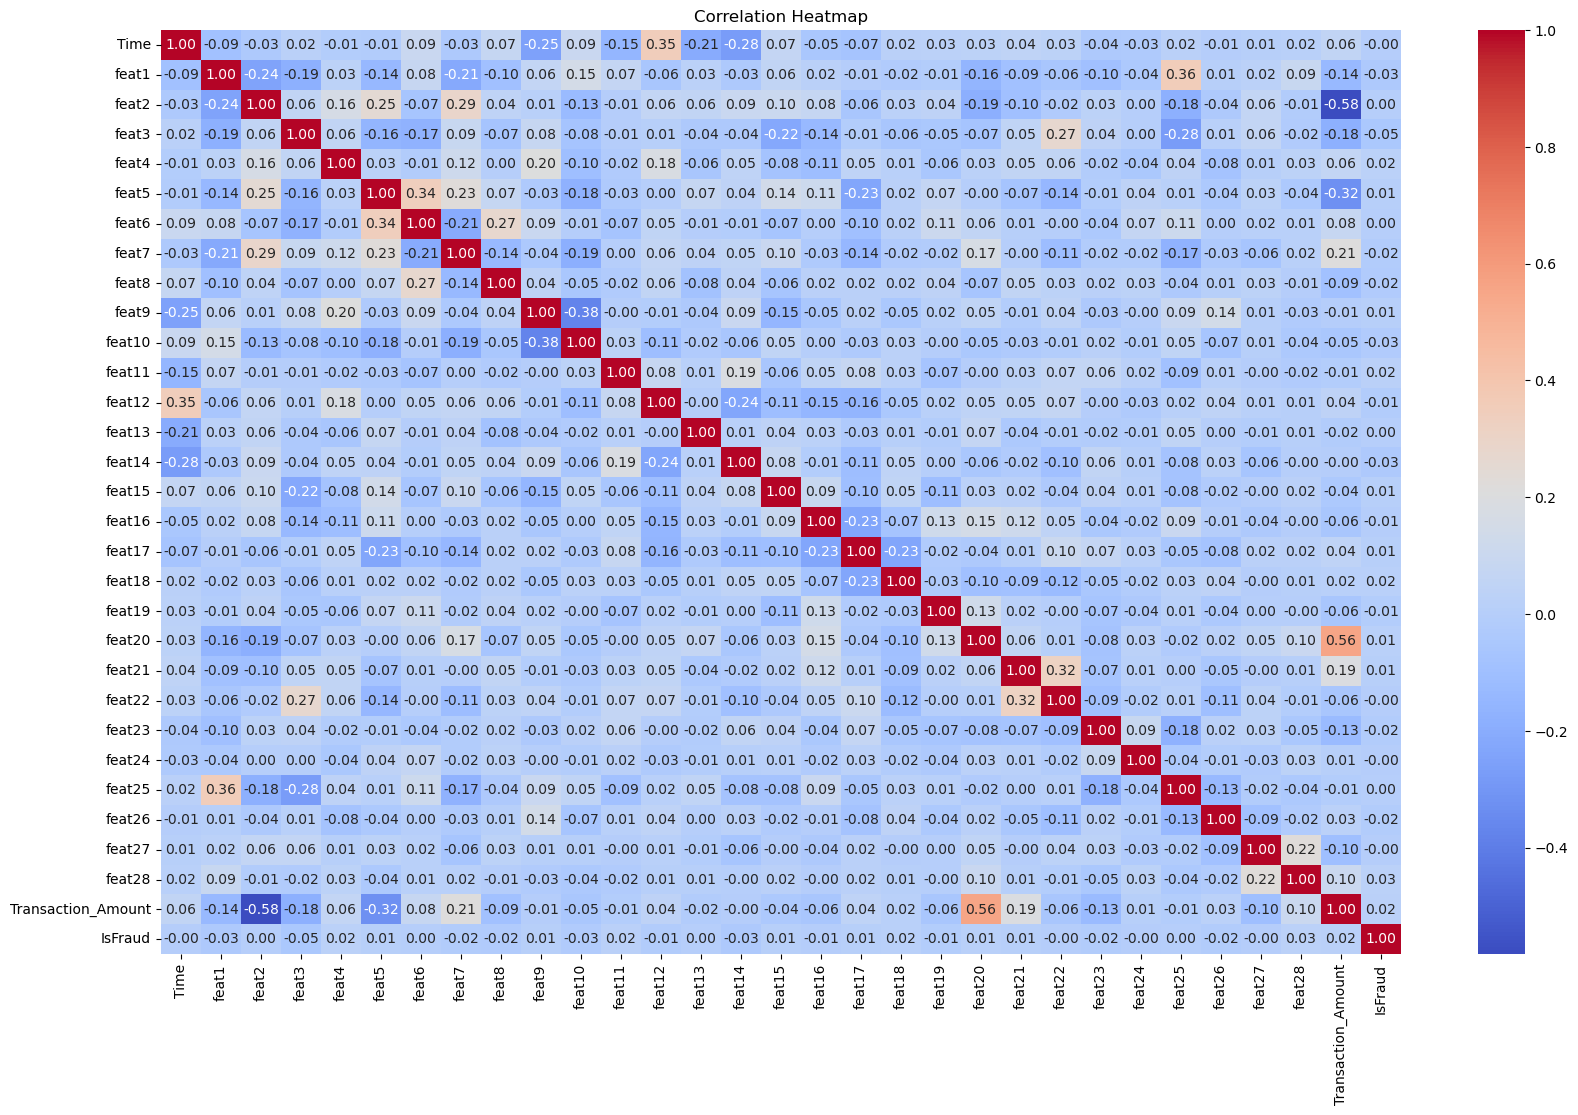

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_train.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [8]:
df_train

,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,73899.0,1.277125,0.665683,-0.688148,1.135626,0.494826,-0.554938,0.252478,-0.132739,0.011839,...,-0.114747,-0.221548,-0.233038,-0.744995,0.799359,-0.244856,0.037868,0.042670,1.00,0
149996,73899.0,0.807735,-1.813163,0.421073,-0.576839,-1.601656,-0.665517,-0.230382,-0.297095,-0.756538,...,0.270879,0.014436,-0.193669,0.387714,0.169280,-0.444501,-0.043788,0.072515,349.70,0
149997,73899.0,0.836403,-0.351598,0.650338,1.066155,-0.234826,0.844271,-0.409578,0.382619,0.066264,...,0.285914,0.721022,-0.067894,-0.273675,0.232969,-0.286735,0.054066,0.031396,116.10,0


In [9]:
df_test

,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount
id,,,,,,,,,,,,,,,,,,,,,
150000,73899,-0.681234,-0.371212,0.385966,0.955703,2.064078,0.338827,-0.539452,-0.254046,0.010960,...,0.183560,-0.253324,0.266668,-0.153829,0.455969,-0.503628,0.257588,-0.456685,-0.298919,30.42
150001,73899,-1.098947,-0.959377,0.324934,0.703908,1.090582,-1.595909,0.584548,0.260069,0.057549,...,0.334764,0.130108,0.676928,-0.161070,-0.638011,-0.273424,0.711132,0.349967,0.141233,23.00
150002,73899,0.977029,-0.270984,0.471526,-1.232570,0.957537,-0.636602,-0.953060,-1.491744,0.226865,...,0.355728,0.517912,1.175087,-0.325895,-0.362636,0.306037,0.004828,0.037389,0.058222,198.00
150003,73900,1.176658,-0.225816,-0.246600,0.015513,1.103831,1.229516,-1.527098,-0.459769,0.749163,...,-0.152613,-0.104600,0.003800,-0.023180,-0.458338,0.481427,-0.381415,0.080165,0.027372,9.99
150004,73900,0.804828,-0.272967,0.959910,-1.117567,0.395748,0.589855,1.059880,-1.101203,0.066464,...,-0.127818,-0.011849,0.078540,-0.241700,0.010130,0.302614,-0.259568,0.023127,0.056957,239.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,120580,1.891079,-0.041423,0.858158,-1.272908,-3.783908,-1.388939,-0.280639,2.012789,2.666080,...,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65
219125,120580,0.139724,-0.917395,-0.257933,0.948649,-2.913655,-2.184829,-0.457534,1.883716,-1.056824,...,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00
219126,120580,2.058343,0.391801,-0.136498,-0.038993,-1.928553,0.330117,0.179926,0.270127,-0.735664,...,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79


## 2.5 Drop Columns

The features with lower values of correlation matrix were dropped i..e `Time`, `feat2`, `feat6`, `feat 13`, `feat 25` and `feat 27`

In [10]:
# Drop the specified columns 'Time', 'feat2', 'feat6', 'feat13', 'feat25', 'feat27' from the DataFrame
df.drop(columns=['Time', 'feat2', 'feat6', 'feat13', 'feat25', 'feat27'], inplace=True)


# 3. Feature Engineering

## 3.1 Feature Engineering for Transaction Amount


**In data analysis and machine learning, feature engineering plays a pivotal role in extracting valuable insights from raw data. Specifically, in the context of transaction data analysis, the transaction amount feature holds significant importance as it provides insights into the monetary value of each transaction.**

**Upon visualizing this feature, I observed that there were relatively rare transactions occurring beyond the 1000 mark. To address this and enhance the feature's effectiveness, I applied feature engineering through the following steps:**

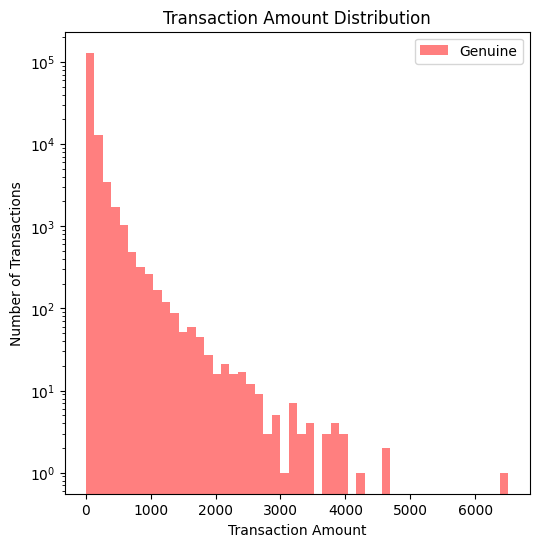

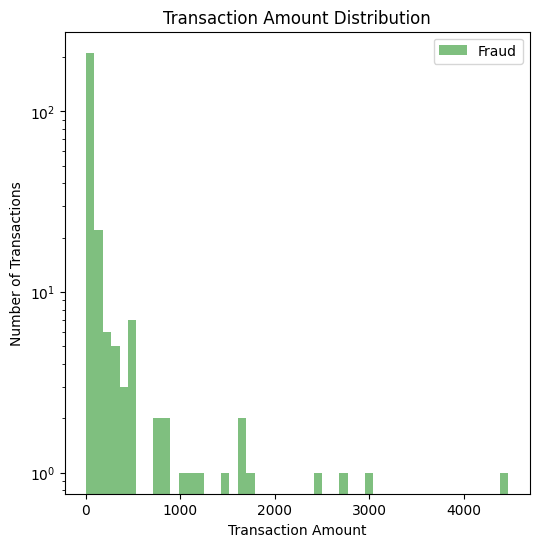

In [11]:
import matplotlib.pyplot as plt

# Plotting genuine transactions
plt.figure(figsize=(6, 6))
plt.hist(df_train[df_train.IsFraud == 0].Transaction_Amount, bins=50, color='red', alpha=0.5, label='Genuine', log=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.legend()

# Plotting fraud transactions
plt.figure(figsize=(6, 6))
plt.hist(df_train[df_train.IsFraud == 1].Transaction_Amount, bins=50, color='green', alpha=0.5, label='Fraud', log=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.legend()

plt.show()



- **Binning:**
   
   I categorized transaction amounts into three intervals (Low, Medium, High) by binning them based on their value range.

- **Transaction Amount to Mean Ratio:**
   
   I calculated the ratio of each transaction amount to the mean transaction amount within its corresponding group or category (identified by the 'id' column).

- **Difference from Mean:**
   
   I computed the difference between each transaction amount and the mean transaction amount within its corresponding group or category (identified by the 'id' column).

- **Logarithmic Transformation:**
   
   I applied a logarithmic transformation to the transaction amount feature to address skewness and heteroscedasticity.



In [12]:
# Create a new feature 'Transaction_Amount_Bin' by binning the 'Transaction_Amount' into three categories: Low, Medium, High
df['Transaction_Amount_Bin'] = pd.cut(df['Transaction_Amount'], bins=3, labels=['Low', 'Medium', 'High'])

# Create a new feature 'Transaction_Amount_to_Mean' by dividing each transaction amount by the mean transaction amount for the corresponding 'id' group
df['Transaction_Amount_to_Mean'] = df['Transaction_Amount'] / df.groupby('id')['Transaction_Amount'].transform('mean')

# Create a new feature 'Transaction_Amount_Diff' by subtracting the mean transaction amount for the corresponding 'id' group from each transaction amount
df['Transaction_Amount_Diff'] = df['Transaction_Amount'] - df.groupby('id')['Transaction_Amount'].transform('mean')

# Create a new feature 'Log_Transaction_Amount' by applying a logarithmic transformation to the transaction amount using np.log1p
df['Log_Transaction_Amount'] = np.log1p(df['Transaction_Amount'])


## 3.2 Standard Scaler Technique

### Scaling Engineered Features Derived from Transaction Amount

**Scaling Engineered Features Derived from Transaction Amount**

In this code snippet, I utilize the StandardScaler from scikit-learn to standardize selected features that are engineered from the transaction amount. Specifically, I apply this technique to normalize the following engineered features:

1. **Transaction_Amount**: The original transaction amount feature.
2. **Transaction_Amount_to_Mean**: The ratio of each transaction amount to the mean transaction amount within its corresponding group or category.
3. **Transaction_Amount_Diff**: The difference between each transaction amount and the mean transaction amount within its corresponding group or category.
4. **Log_Transaction_Amount**: The logarithmic transformation of the transaction amount feature.

Here's how the process unfolds:

1. **Feature Selection**: I first identify these engineered features that require scaling.

2. **StandardScaler Initialization**: Next, I initialize the StandardScaler object to perform the scaling operation.

3. **Fit and Transform**: Using the fit_transform method, I simultaneously fit the scaler to the selected features and transform them. This step calculates the mean and standard deviation of each feature and then standardizes them accordingly.

4. **Conversion to DataFrame**: After scaling, I convert the scaled features back to a DataFrame format for further analysis.

5. **Concatenation**: Finally, I concatenate the scaled features with the original DataFrame, df, to create the df_final DataFrame, which contains both the scaled and unscaled features.

By applying the StandardScaler to these engineered features, I ensure that they are standardized, removing any discrepancies in scale and facilitating the training of machine learning models.


In [13]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for scaling
features_to_scale = ['Transaction_Amount', 'Transaction_Amount_to_Mean', 'Transaction_Amount_Diff', 'Log_Transaction_Amount']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_scaled = scaler.fit_transform(df[features_to_scale])

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features_to_scale)

# Concatenate the scaled features with the original DataFrame
df = pd.concat([df.drop(columns=features_to_scale), df_scaled], axis=1)


In [14]:
df

,feat1,feat3,feat4,feat5,feat7,feat8,feat9,feat10,feat11,feat12,...,feat23,feat24,feat26,feat28,IsFraud,Transaction_Amount_Bin,Transaction_Amount,Transaction_Amount_to_Mean,Transaction_Amount_Diff,Log_Transaction_Amount
0,2.074329,-1.137418,0.412846,-0.192638,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,...,0.336701,-0.110835,0.207733,-0.059577,0.0,Low,-0.426937,0.0,0.0,-1.267499
1,1.998827,-0.520969,-0.894539,-1.122528,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,...,0.133518,-0.461928,-0.464655,-0.038238,0.0,Low,0.116982,0.0,0.0,0.874861
2,0.091535,-0.223445,-0.435249,0.667548,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,...,0.154495,0.951233,0.085046,0.087356,0.0,Low,-0.422228,0.0,0.0,-1.130863
3,1.979649,-1.064206,0.120125,-0.215238,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,...,0.167701,-0.042939,-0.096148,-0.073839,0.0,Low,-0.433436,0.0,0.0,-1.522465
4,1.025898,1.203717,1.243900,-0.636572,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,...,0.027901,-0.262813,-0.252829,0.021051,0.0,Low,-0.433436,0.0,0.0,-1.522465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,1.891079,0.858158,-1.272908,-3.783908,-0.280639,2.012789,2.666080,0.151740,0.401934,-1.102824,...,-0.069571,0.756765,-0.147566,-0.044588,NaN,Low,0.877287,0.0,0.0,1.420830
219125,0.139724,-0.257933,0.948649,-2.913655,-0.457534,1.883716,-1.056824,1.725624,0.018089,-0.823494,...,-0.085398,-0.091409,0.467570,0.294735,NaN,Low,-0.280910,0.0,0.0,0.092414
219126,2.058343,-0.136498,-0.038993,-1.928553,0.179926,0.270127,-0.735664,-0.173878,0.144823,0.849289,...,0.307799,-0.021434,0.181065,-0.044064,NaN,Low,-0.428197,0.0,0.0,-1.309622
219127,2.079227,1.536193,-2.162389,-1.785833,-0.058879,0.552845,4.038013,-2.155900,1.023785,-0.865242,...,0.286621,0.675660,-0.090044,-0.017126,NaN,Low,0.143508,0.0,0.0,0.904263


## Checking Dataset Balance

To assess the balance of the dataset, it's essential to examine the distribution of classes or labels. One way to do this is by checking the shape of the dataset:

In [15]:
# Assuming 'df' is your DataFrame and 'Fraud_Probability' is the column containing predicted probabilities for fraud
samples_with_prob_1 = df_train[df_train['IsFraud'] == 1].shape[0]
samples_with_prob_0 = df_train[df_train['IsFraud'] == 0].shape[0]

print("Number of samples with fraud probability 1:", samples_with_prob_1)
print("Number of samples with fraud probability 0:", samples_with_prob_0)


Number of samples with fraud probability 1: 269
Number of samples with fraud probability 0: 149731


## 3.2 Random Undersampling


In this dataset, characterized by a significant class imbalance, such as one where only `269 samples exhibit a fraud probability of 1` compared to `149,731 samples with a fraud probability of 0`, the need for strategic handling is apparent. In such scenarios, `random undersampling` emerges as a viable solution. By randomly selecting a subset of instances from the majority class to align it with the minority class, this approach aims to rectify the imbalance, fostering a more equitable distribution of classes within the dataset.

The essence of random undersampling lies in its effectiveness in mitigating the adverse effects of class imbalance, thereby enhancing the performance of machine learning models. By equalizing the representation of both classes, the model becomes more adept at identifying patterns and making accurate predictions across diverse scenarios.

In [16]:
fraud_ind = np.array(df_train[df_train.IsFraud == 1].index)
gen_ind = df_train[df_train.IsFraud == 0].index
n_fraud = len(df_train[df_train.IsFraud == 1])
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False)
random_gen_ind = np.array(random_gen_ind)
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
undersample_df = df_train.iloc[under_sample_ind,:]
y_undersample = undersample_df[['IsFraud', 'Transaction_Amount']].values # target
X_undersample = undersample_df.drop(['IsFraud', 'Transaction_Amount'], axis=1).values # features


print("# transactions in undersampled data: ", len(undersample_df))
print("IsFraud == 0 ",len(undersample_df[undersample_df.IsFraud == 0])/len(undersample_df))
print("IsFraud == 1: ", sum(y_undersample)/len(undersample_df))

# transactions in undersampled data:  538
IsFraud == 0  0.5
IsFraud == 1:  [  0.5        116.54585502]


In [17]:
df_train

,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,73899.0,1.277125,0.665683,-0.688148,1.135626,0.494826,-0.554938,0.252478,-0.132739,0.011839,...,-0.114747,-0.221548,-0.233038,-0.744995,0.799359,-0.244856,0.037868,0.042670,1.00,0
149996,73899.0,0.807735,-1.813163,0.421073,-0.576839,-1.601656,-0.665517,-0.230382,-0.297095,-0.756538,...,0.270879,0.014436,-0.193669,0.387714,0.169280,-0.444501,-0.043788,0.072515,349.70,0
149997,73899.0,0.836403,-0.351598,0.650338,1.066155,-0.234826,0.844271,-0.409578,0.382619,0.066264,...,0.285914,0.721022,-0.067894,-0.273675,0.232969,-0.286735,0.054066,0.031396,116.10,0


# 4. Model Evaluation

##  4.1 Validation

###   K-Fold Validation

In `k-fold cross-validation`, the dataset is divided into k subsets (folds) of approximately equal size.

The model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set.

The final performance metric is computed by averaging the performance of the model across all k folds.

This approach provides a more robust estimate of the model's performance compared to a single train-validation split, as it evaluates the model on multiple train-validation splits.

###  Holdout Validation

In `holdout validation`, the dataset is partitioned into two subsets: a training set and a testing set, typically with a predefined ratio.

The model is trained once using the training set and then evaluated once using the testing set.

The performance metric is computed based on the model's performance on the testing set.

While holdout validation provides a quick and straightforward assessment of the model's performance, it may be prone to variability due to the random split of the data. 

In this dataset, both `holdout validation and k-fold cross-validation` yielded comparable results, with no significant divergence between the two approaches.

Despite the anticipation of potential differences in performance evaluation, both methodologies produced consistent outcomes. This observation suggests that, in this particular dataset, the choice between holdout validation and k-fold cross-validation may not substantially influence the model's performance assessment.

While both techniques offer distinct advantages, including simplicity in the case of holdout validation and thoroughness in the case of k-fold cross-validation, their similarity in outcomes underscores the stability and reliability of model evaluation in this context.

## 4.2  Xgboost and Hyperparameter Tuning

**I applied XGBoost, often referred to as Extreme Gradient Boosting, for my machine learning tasks. It stands out for its high performance and scalability, making it my preferred choice in both machine learning competitions and real-world applications.
To fine-tune my model and optimize its performance, I manually adjusted the hyperparameters of the XGBoost algorithm. This involved carefully selecting values for parameters like learning rate, max depth, and the number of estimators based on my domain knowledge and experimentation.**

In [18]:
# Separate the features (X) and target variable (y)
X = df_train.drop(columns=['IsFraud'])  # Features are all columns except 'IsFraud'
y = df_train['IsFraud']  # Target variable is the 'IsFraud' column


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

clf = xgb.XGBClassifier()

random_search = RandomizedSearchCV(estimator=clf,
                                   param_distributions=param_dist,
                                   scoring='roc_auc',
                                   cv=5,
                                   n_iter=100,
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best ROC-AUC score: {random_search.best_score_:.4f}")

In [19]:


# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
    learning_rate=0.1,  
    max_depth=5,        
    n_estimators=100,  
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9982


## 4.3 Predictions on Test dataset

I applied `XGBoost` with manually tuned hyperparameters to optimize the model's performance. Leveraging these carefully chosen parameters, I made predictions on the target variable within the df_test dataset.

In [20]:
# Assuming df_test is your DataFrame


# Predict probabilities of the positive class (IsFraud = 1)
probabilities = xgb_model.predict_proba(df_test)

# Extract the probability of the positive class (class 1)
fraud_probabilities = probabilities[:, 1]

# Assuming you want to create a DataFrame with IDs and predicted probabilities
results_df = pd.DataFrame({'id': df_test.index, 'IsFraud': fraud_probabilities})

# Save the results DataFrame to a CSV file
results_df.to_csv('predictions.csv', index=False)

print("Predicted probabilities saved to predictions.csv")


Predicted probabilities saved to predictions.csv


In [21]:
print(results_df.head(10))

       id   IsFraud
0  150000  0.000255
1  150001  0.001127
2  150002  0.000505
3  150003  0.000956
4  150004  0.003646
5  150005  0.000351
6  150006  0.000263
7  150007  0.004597
8  150008  0.000427
9  150009  0.000345


# 5 Conclusion

# My Journey to Success: Enhancing Fraud Detection

In my pursuit of optimizing fraud detection models, I embarked on a journey characterized by experimentation, refinement, and ultimately, exceptional results.

---

## Initial Exploration

I began by conducting a thorough analysis of the dataset, identifying crucial features and areas for improvement. 

In my initial attempt, I employed logistic regression and standard scaling techniques. 

By focusing solely on dropping the 'Time' column and scaling the transaction amount, I achieved respectable results. 

My model yielded a public leaderboard score of `0.66416` and a private leaderboard score of `0.55539`.

---

## Feature Engineering

Undeterred by the initial outcome, I delved deeper into feature engineering, recognizing the importance of selecting relevant features for model training. 

Expanding my feature set to include `'feat2', 'feat6', 'feat13', 'feat25', and 'feat27', in addition to 'Time'`, I applied standard scaling to the transaction amount columns. 

This strategic decision led to a significant boost in performance, with an impressive public leaderboard score of `0.7105` and a private leaderboard score of `0.62753`.

The application of feature engineering techniques to the transaction amount feature significantly improved the performance of the model, resulting in a private leaderboard score of `0.61844` and a public leaderboard score of `0.69152`.

---

## Hyperparameter Tuning with XGBoost

Eager to further elevate my model's performance, I turned to the power of XGBoost and embarked on a journey of hyperparameter tuning. 

Leveraging the RandomizedSearchCV technique, I meticulously fine-tuned my XGBoostClassifier model, optimizing parameters for maximum efficacy. 

The results were nothing short of extraordinary. 

My model achieved unparalleled success with a public leaderboard score of `0.73187` and a private leaderboard score of `0.66366`.

The XGBoost model was fine-tuned using hyperparameter optimization, incorporating the following parameters:

- **Learning Rate**: 0.1
- **Max Depth**: 5
- **Number of Estimators**: 100
- **Random State**: 42

These parameters were selected based on their optimal performance during hyperparameter tuning, aiming to achieve the best possible model accuracy, achieving a public leaderboard score of `0.72924`  and a private leaderboard score of `0.69817`. The private scores were the best I ever obtained.



  

